In [272]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [273]:
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

In [274]:
from keras.utils import plot_model
from keras.utils import to_categorical

In [275]:
import pandas as pd

In [276]:
from sklearn.metrics import confusion_matrix
import itertools

In [277]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

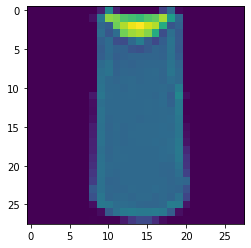

In [278]:
plt.imshow(train_images[2,:,:])
plt.show()

In [279]:
print(train_images.shape) # (60000, 28, 28)
print(test_images.shape)  # (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [280]:
# Normalize the images.
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [281]:
train_images.min(), train_images.max()

(-1.0, 1.0078740157480315)

In [282]:
test_images.min(), test_images.max()

(-1.0, 1.0078740157480315)

## 1. Опишите - какой результат получен в нейросети в зависимости от:

        a. числа нейронов в слое(для 2-хслойной сети)

In [283]:
df = pd.DataFrame(columns=['no. neurons', 'train accuracy', 'val_accuracy'])

In [284]:

for n_neurons in range(1,500,40):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    
    df = df.append({'no. neurons': n_neurons, 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0724 - accuracy: 0.1739 - val_loss: 1.8362 - val_accuracy: 0.1942
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.7913 - accuracy: 0.2038 - val_loss: 1.7243 - val_accuracy: 0.2007
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.7102 - accuracy: 0.2065 - val_loss: 1.6953 - val_accuracy: 0.2160
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.6900 - accuracy: 0.2042 - val_loss: 1.6882 - val_accuracy: 0.2072
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.6797 - accuracy: 0.2030 - val_loss: 1.6831 - val_accuracy: 0.2025
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6786 - accuracy: 0.7661 - val_loss: 0.4576 - val_accuracy: 0.8318
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4240 - accuracy: 0.8433 - val_loss: 0.4042 - val_accuracy: 0.8537

In [285]:
df

,no. neurons,train accuracy,val_accuracy
0,1.0,0.201708,0.202500
1,41.0,0.874896,0.861333
2,81.0,0.880021,0.867250
3,121.0,0.880021,0.865000
4,161.0,0.880229,0.865750
5,201.0,0.881292,0.865667
6,241.0,0.878937,0.865417
7,281.0,0.878646,0.854750
8,321.0,0.877729,0.850583
9,361.0,0.877062,0.861833


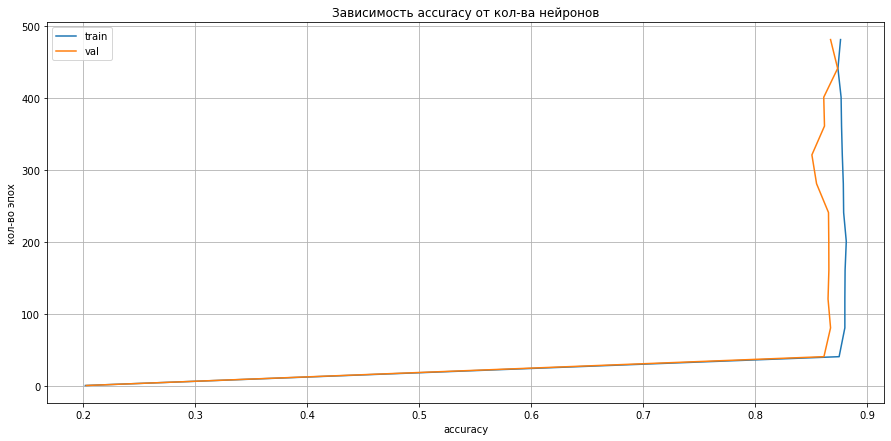

In [286]:
plt.figure(figsize=(15,7))
plt.plot(df['train accuracy'], df['no. neurons'], label='train')
plt.plot(df['val_accuracy'], df['no. neurons'], label='val')
plt.title('Зависимость accuracy от кол-ва нейронов')
plt.xlabel('accuracy')
plt.ylabel('кол-во эпох')
plt.grid('On')
plt.legend();

**Вывод:
    При увеличении количества нейронов показатель accuracy растет. 
    После кол-ва нейронов 161 показатель accuracy немного падает. Недостатоно данных для такого количства нейронов.**

Посмотрим из чего она состоит:

In [287]:
model.summary()

Model: "sequential_146"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_366 (Dense)            (None, 481)               377585    
_________________________________________________________________
dense_367 (Dense)            (None, 10)                4820      
Total params: 382,405
Trainable params: 382,405
Non-trainable params: 0
_________________________________________________________________


Выводим картинку со схемой модели

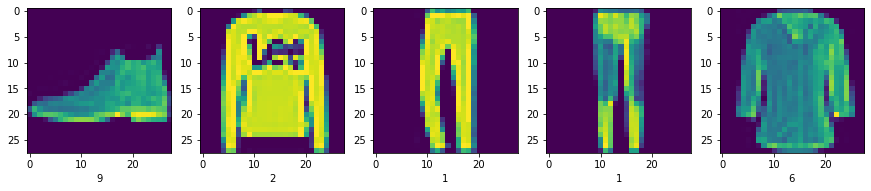

In [288]:
N = 5
y_pred = model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [289]:
y_pred_class

array([9, 2, 1, 1, 6], dtype=int64)

## б. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).

In [290]:
df_1b = pd.DataFrame(columns=['no. layers', 'no. neurons', 'train accuracy', 'val_accuracy'])

**2-x слойная модель, число нейронов: 64, 128, 192**

In [291]:
for n_neurons in range(64, 193, 64):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])
    
    no_layers = 2

# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc_1b = history.history['accuracy'][-1]
    val_acc_1b = history.history['val_accuracy'][-1]

    
    df_1b = df_1b.append({'no. layers': no_layers, 'no. neurons': n_neurons, 'train accuracy': train_acc_1b, 'val_accuracy': val_acc_1b}, ignore_index=True)
    

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6269 - accuracy: 0.7814 - val_loss: 0.4200 - val_accuracy: 0.8464
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3990 - accuracy: 0.8550 - val_loss: 0.4021 - val_accuracy: 0.8528
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8669 - val_loss: 0.3978 - val_accuracy: 0.8567
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3452 - accuracy: 0.8739 - val_loss: 0.3758 - val_accuracy: 0.8683
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3273 - accuracy: 0.8802 - val_loss: 0.3912 - val_accuracy: 0.8574
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6124 - accuracy: 0.7835 - val_loss: 0.4008 - val_accuracy: 0.8552
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3893 - accuracy: 0.8593 - val_loss: 0.4045 - val_accuracy: 0.8518

**3-x слойная модель, число нейронов: 64, 128, 192**

In [292]:
for n_neurons in range(64, 193, 64):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(n_neurons, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    no_layers = 3
# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    
    df_1b = df_1b.append({'no. layers': no_layers, 'no. neurons': n_neurons, 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)
    

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7799 - val_loss: 0.4175 - val_accuracy: 0.8488
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4007 - accuracy: 0.8558 - val_loss: 0.3995 - val_accuracy: 0.8563
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3680 - accuracy: 0.8674 - val_loss: 0.3931 - val_accuracy: 0.8573
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3566 - accuracy: 0.8692 - val_loss: 0.3821 - val_accuracy: 0.8618
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3373 - accuracy: 0.8769 - val_loss: 0.3701 - val_accuracy: 0.8663
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6086 - accuracy: 0.7817 - val_loss: 0.4274 - val_accuracy: 0.8408
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3993 - accuracy: 0.8534 - val_loss: 0.4215 - val_accuracy: 0.8474

**5-ти слойная модель, число нейронов: 64, 128, 192**

In [293]:
for n_neurons in range(64, 193, 64):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(n_neurons, activation='tanh'),  
    Dense(n_neurons, activation='tanh'),    
    Dense(n_neurons, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    no_layers = 5
# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    
    df_1b = df_1b.append({'no. layers': no_layers, 'no. neurons': n_neurons, 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)
    

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6453 - accuracy: 0.7748 - val_loss: 0.4682 - val_accuracy: 0.8357
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4164 - accuracy: 0.8500 - val_loss: 0.4178 - val_accuracy: 0.8459
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3919 - accuracy: 0.8588 - val_loss: 0.3982 - val_accuracy: 0.8534
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3667 - accuracy: 0.8657 - val_loss: 0.3892 - val_accuracy: 0.8616
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3531 - accuracy: 0.8689 - val_loss: 0.3613 - val_accuracy: 0.8654
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6209 - accuracy: 0.7756 - val_loss: 0.4762 - val_accuracy: 0.8264
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4129 - accuracy: 0.8488 - val_loss: 0.4470 - val_accuracy: 0.8345

**10-ти слойная модель, число нейронов: 64, 128, 192**

In [294]:
for n_neurons in range(64, 193, 64):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(n_neurons, activation='tanh'),  
    Dense(n_neurons, activation='tanh'),    
    Dense(n_neurons, activation='tanh'),   
    Dense(n_neurons, activation='tanh'),      
    Dense(n_neurons, activation='tanh'),     
    Dense(n_neurons, activation='tanh'),      
    Dense(n_neurons, activation='tanh'),      
    Dense(n_neurons, activation='tanh'),      
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    no_layers = 10
# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    
    df_1b = df_1b.append({'no. layers': no_layers, 'no. neurons': n_neurons, 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7126 - accuracy: 0.7509 - val_loss: 0.4613 - val_accuracy: 0.8340
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4611 - accuracy: 0.8350 - val_loss: 0.4721 - val_accuracy: 0.8206
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8475 - val_loss: 0.4425 - val_accuracy: 0.8401
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4098 - accuracy: 0.8525 - val_loss: 0.4047 - val_accuracy: 0.8548
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3832 - accuracy: 0.8636 - val_loss: 0.4072 - val_accuracy: 0.8583
Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6864 - accuracy: 0.7545 - val_loss: 0.5640 - val_accuracy: 0.8037
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4912 - accuracy: 0.8270 - val_loss: 0.4932 - val_accuracy: 0.8279

In [295]:
df_1b

,no. layers,no. neurons,train accuracy,val_accuracy
0,2.0,64.0,0.879667,0.857417
1,2.0,128.0,0.880625,0.867500
2,2.0,192.0,0.880875,0.852083
3,3.0,64.0,0.876500,0.866333
4,3.0,128.0,0.876562,0.868250
5,3.0,192.0,0.878896,0.870167
6,5.0,64.0,0.870104,0.865417
7,5.0,128.0,0.871333,0.864750
8,5.0,192.0,0.870771,0.856333
9,10.0,64.0,0.860667,0.858333


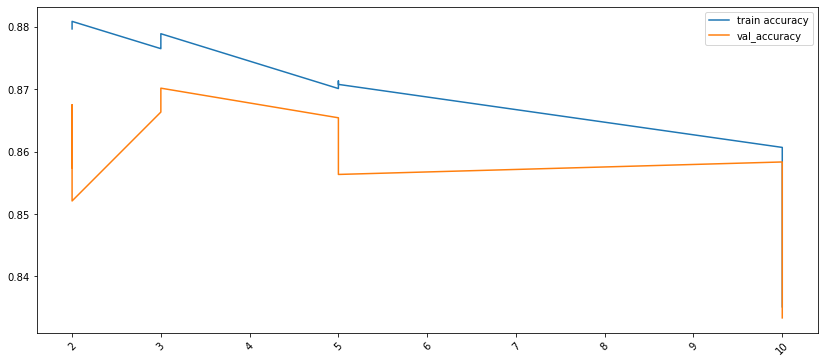

In [296]:
plt.figure(figsize=(14,6)) 
plt.plot(df_1b['no. layers'], df_1b['train accuracy'], label='train accuracy')
plt.plot(df_1b['no. layers'], df_1b['val_accuracy'], label='val_accuracy')
plt.xticks(rotation=45)
plt.legend();

**Вывод: Оптимальная настройка: 3 слоя/128 нейронов. дальнейшее увеличение слоев к улушению accuracy не привели.**

## 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [297]:
df_2 = pd.DataFrame(columns=['optimizer', 'train accuracy', 'val_accuracy'])

In [298]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(128, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

    # Train the model.
history= model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=5,
    batch_size=32, validation_split=0.2
)
    
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
    
df_2 = df_2.append({'optimizer': 'adam', 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)
    

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6085 - accuracy: 0.7818 - val_loss: 0.4298 - val_accuracy: 0.8422
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3981 - accuracy: 0.8550 - val_loss: 0.3894 - val_accuracy: 0.8566
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3671 - accuracy: 0.8644 - val_loss: 0.3684 - val_accuracy: 0.8677
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3433 - accuracy: 0.8718 - val_loss: 0.3626 - val_accuracy: 0.8676
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3242 - accuracy: 0.8801 - val_loss: 0.3657 - val_accuracy: 0.8687


In [299]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(128, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

    # Train the model.
history= model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=5,
    batch_size=32, validation_split=0.2
)
    
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
    
df_2 = df_2.append({'optimizer': 'SGD', 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8487 - accuracy: 0.7255 - val_loss: 0.5056 - val_accuracy: 0.8169
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4659 - accuracy: 0.8368 - val_loss: 0.4430 - val_accuracy: 0.8425
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4163 - accuracy: 0.8534 - val_loss: 0.4117 - val_accuracy: 0.8537
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3904 - accuracy: 0.8599 - val_loss: 0.3902 - val_accuracy: 0.8607
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3698 - accuracy: 0.8679 - val_loss: 0.3821 - val_accuracy: 0.8618


In [300]:
my_model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(128, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
my_model.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

    # Train the model.
history= my_model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=5,
    batch_size=32, validation_split=0.2
)
    
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
    
df_2 = df_2.append({'optimizer': 'RMSProp', 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6335 - accuracy: 0.7687 - val_loss: 0.4320 - val_accuracy: 0.8355
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3969 - accuracy: 0.8524 - val_loss: 0.3905 - val_accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3562 - accuracy: 0.8679 - val_loss: 0.3664 - val_accuracy: 0.8683
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3324 - accuracy: 0.8764 - val_loss: 0.3563 - val_accuracy: 0.8731
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8854 - val_loss: 0.3687 - val_accuracy: 0.8672


In [301]:
df_2

,optimizer,train accuracy,val_accuracy
0,adam,0.878875,0.868750
1,SGD,0.869875,0.861833
2,RMSProp,0.883042,0.867167


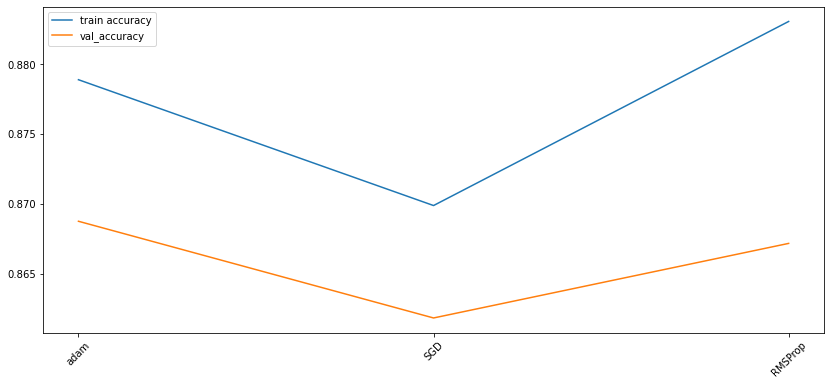

In [302]:
plt.figure(figsize=(14,6)) 
plt.plot(df_2['optimizer'], df_2['train accuracy'], label='train accuracy')
plt.plot(df_2['optimizer'], df_2['val_accuracy'], label='val_accuracy')
plt.xticks(rotation=45)
plt.legend();

**Вывод: Хуже себя показал оптимизатор SGD. 
         Небольшая разница между accuracy val и accuracy train на оптимизаторе adam говорит о возможном            переобучении.
         Поэтому выбираю оптимизатор RMSProp.**
         
    

## 4. Для одного варианта сетей сформируйте матрицу ошибок по классам.

In [303]:
y_pred = my_model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

In [304]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


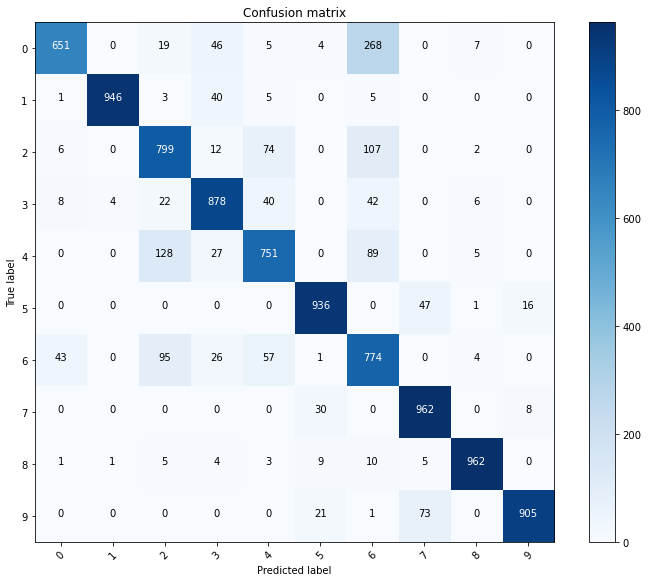

In [305]:
cnf_matrix = confusion_matrix(test_labels, y_pred_class)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

In [306]:
def get_precision_and_recall_from_confusion_matrix(label, cnf_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(cnf_matrix)):
        str_sum += cnf_matrix[label][i]
        col_sum += cnf_matrix[i][label]
        
    return cnf_matrix[label][label] / str_sum, cnf_matrix[label][label] / col_sum

In [307]:
pr_rc_result = pd.DataFrame()
precisions = []
recalls = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for l in labels:
    p_r = get_precision_and_recall_from_confusion_matrix(l, cnf_matrix)
    precisions.append(p_r[0])
    recalls.append(p_r[1])
pr_rc_result['label'] = labels
pr_rc_result['precision'] = precisions
pr_rc_result['recall'] = recalls

pr_rc_result.sort_values(by='precision', ascending=False)

,label,precision,recall
7,7,0.962,0.885005
8,8,0.962,0.974671
1,1,0.946,0.994742
5,5,0.936,0.935065
9,9,0.905,0.974166
3,3,0.878,0.849952
2,2,0.799,0.746032
6,6,0.774,0.597222
4,4,0.751,0.803209
0,0,0.651,0.916901


In [308]:
pr_rc_result.sort_values(by='recall', ascending=False)

,label,precision,recall
1,1,0.946,0.994742
8,8,0.962,0.974671
9,9,0.905,0.974166
5,5,0.936,0.935065
0,0,0.651,0.916901
7,7,0.962,0.885005
3,3,0.878,0.849952
4,4,0.751,0.803209
2,2,0.799,0.746032
6,6,0.774,0.597222
